In [2]:
# imports 

import numpy as np
import matplotlib.pyplot as plt 
import tensorflow as tf 
from sklearn.metrics import confusion_matrix
from numpy import linalg as la 
import scipy
import timeit

# validate that imports and dependencies are setup correctly 
print("Imports successful ...")

Imports successful ...


## Problem 1 

### Part a 

In [3]:

# load the mnst characer dataset
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
y_test

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

### Part b and c

Text(0.5, 1.0, 'Test Data 3')

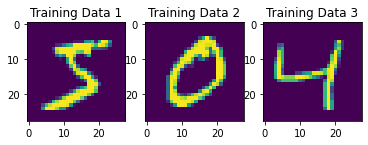

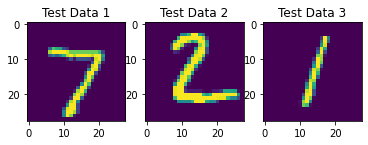

In [324]:
# create a plotting object and show examples
f, (ax1, ax2, ax3) = plt.subplots(1, 3)

ax1.imshow(x_train[0,:,:])
ax1.set_title('Training Data 1')

ax2.imshow(x_train[1, :, :])
ax2.set_title('Training Data 2')

ax3.imshow(x_train[2, :, :])
ax3.set_title('Training Data 3')

f, (ax1, ax2, ax3) = plt.subplots(1, 3)

ax1.imshow(x_test[0,:,:])
ax1.set_title('Test Data 1')

ax2.imshow(x_test[1,:,:])
ax2.set_title('Test Data 2')

ax3.imshow(x_test[2,:,:])
ax3.set_title('Test Data 3')

In [325]:
y_test[2500] 

2

In [326]:
784/16

49.0

### Part d

In [327]:
# construct a machine learning model
model = tf.keras.models.Sequential([tf.keras.layers.Flatten(), 
                                    tf.keras.layers.Dense(784, activation=tf.nn.tanh),
                                    tf.keras.layers.Dropout(0.2), 
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])


In [328]:
#compile model
model.compile(optimizer="SGD", loss = 'mean_squared_error', metrics=['accuracy'])

In [329]:
model.fit(x_train, y_train, epochs=1)

1875/1875 [==============================] - 3s 1ms/step - loss: 27.3172 - accuracy: 0.1115


In [330]:
test_predictions = model.predict(x_test)

### Part e 

In [331]:
confusion = confusion_matrix(y_test, np.argmax(test_predictions, axis=1))

In [332]:
confusion

array([[ 95,  87, 103,  69, 180,  93, 100,  88,  89,  76],
       [158,  96, 135, 124, 107,  91,  83, 106,  74, 161],
       [ 96, 133,  83, 110, 119, 120, 101,  99,  79,  92],
       [ 61, 136, 117,  99,  79, 109, 103, 118,  70, 118],
       [ 73,  60, 123,  88,  82,  77, 142,  84, 103, 150],
       [112, 105,  62, 100,  51,  49, 103,  81, 123, 106],
       [ 97,  77, 132,  88,  70,  98, 127, 100,  92,  77],
       [ 60, 144, 104, 105,  91, 127, 107, 128,  38, 124],
       [103, 103,  35,  96,  93, 126, 115, 105, 116,  82],
       [117, 123,  79, 133, 138, 128,  74,  56,  57, 104]], dtype=int64)

In [333]:
model.compile(optimizer="SGD", loss = 'mean_squared_error', metrics=['accuracy'])
model.fit(x_train, y_train, epochs=3, validation_split=0.1)

Epoch 1/3
1688/1688 [==============================] - 3s 2ms/step - loss: 27.2976 - accuracy: 0.1043 - val_loss: 27.4640 - val_accuracy: 0.1033
Epoch 2/3
1688/1688 [==============================] - 3s 2ms/step - loss: 27.2966 - accuracy: 0.1049 - val_loss: 27.4633 - val_accuracy: 0.1025
Epoch 3/3
1688/1688 [==============================] - 3s 2ms/step - loss: 27.2959 - accuracy: 0.1029 - val_loss: 27.4629 - val_accuracy: 0.0973


In [334]:
test_predictions = model.predict(x_test)
confusion = confusion_matrix(y_test, np.argmax(test_predictions, axis=1))
confusion

array([[ 92, 113,  93,  87, 125, 103,  92, 107,  94,  74],
       [ 90,  96, 104, 117, 110, 107, 150, 117, 104, 140],
       [ 94, 114,  96,  89, 116, 135,  94,  90, 105,  99],
       [ 70, 114, 111,  82,  94, 112,  99, 108, 109, 111],
       [ 79,  79,  97,  94, 102,  80,  94, 108, 134, 115],
       [ 97,  73,  90,  86,  79,  59,  81, 118, 117,  92],
       [101, 104,  83,  95, 105,  80,  79, 118,  92, 101],
       [126, 112,  81, 100,  87, 125,  79, 118,  89, 111],
       [ 98,  85,  85,  96, 100, 106, 100, 101, 106,  97],
       [132, 114,  84, 113, 107,  85,  90,  92,  95,  97]], dtype=int64)

In [335]:
# use a different loss function than mean squared error
model.compile(optimizer="SGD", loss='sparse_categorical_crossentropy', metrics = ['accuracy'])

In [336]:
model.fit(x_train, y_train, epochs=1)

1875/1875 [==============================] - 3s 2ms/step - loss: 0.5180 - accuracy: 0.8391


In [337]:
test_predictions = model.predict(x_test)
confusion = confusion_matrix(y_test, np.argmax(test_predictions, axis=1))
confusion

array([[ 952,    0,    3,    2,    0,    6,    9,    0,    5,    3],
       [   0, 1107,    6,    6,    1,    0,    3,    1,   11,    0],
       [  12,    2,  910,   18,   12,    2,   16,   15,   33,   12],
       [   4,    0,   22,  915,    1,   20,    2,    7,   22,   17],
       [   1,    3,    5,    0,  794,    0,   15,    3,    8,  153],
       [  12,    2,    7,   35,    8,  769,   13,    3,   20,   23],
       [  16,    3,    5,    4,   15,   14,  893,    2,    4,    2],
       [   3,   12,   32,    2,    5,    1,    1,  893,    2,   77],
       [   8,    1,   17,   23,   13,   18,   10,    3,  828,   53],
       [   8,    4,    7,   10,   16,    7,    0,    4,    7,  946]],
      dtype=int64)

In [338]:
model.compile(optimizer="SGD", loss="sparse_categorical_crossentropy", metrics=['accuracy'])
model.fit(x_train, y_train, epochs=3, validation_split=0.1)
confusion = confusion_matrix(y_test, np.argmax(test_predictions, axis=1))
confusion

Epoch 1/3
1688/1688 [==============================] - 3s 2ms/step - loss: 0.3839 - accuracy: 0.8837 - val_loss: 0.2558 - val_accuracy: 0.9275
Epoch 2/3
1688/1688 [==============================] - 3s 2ms/step - loss: 0.3560 - accuracy: 0.8921 - val_loss: 0.2286 - val_accuracy: 0.9380
Epoch 3/3
1688/1688 [==============================] - 3s 2ms/step - loss: 0.3378 - accuracy: 0.8964 - val_loss: 0.2261 - val_accuracy: 0.9347


array([[ 952,    0,    3,    2,    0,    6,    9,    0,    5,    3],
       [   0, 1107,    6,    6,    1,    0,    3,    1,   11,    0],
       [  12,    2,  910,   18,   12,    2,   16,   15,   33,   12],
       [   4,    0,   22,  915,    1,   20,    2,    7,   22,   17],
       [   1,    3,    5,    0,  794,    0,   15,    3,    8,  153],
       [  12,    2,    7,   35,    8,  769,   13,    3,   20,   23],
       [  16,    3,    5,    4,   15,   14,  893,    2,    4,    2],
       [   3,   12,   32,    2,    5,    1,    1,  893,    2,   77],
       [   8,    1,   17,   23,   13,   18,   10,    3,  828,   53],
       [   8,    4,    7,   10,   16,    7,    0,    4,    7,  946]],
      dtype=int64)

## Homework Question 2

### Part a 

In [339]:
#x = np.random.randint(-5, 5, (10, 2))
x = np.array([
    [-4.0,-4.0],
    [1.0, 0.0],
    [2.0, 3.0],
    [-1.0, 2.0],
    [-2.0, -2.0],
    [-4.0, -1.0],
    [-2.0, -1.0],
    [-5.0, -5.0],
    [-2.0, -3.0],
    [4.0, 4.0]
])

In [340]:
c1 = x[0,:]
c2 = x[1,:]
c3 = x[2,:]

dist1 = c1 - x
dist2 = c2 - x
dist3 = c3 - x 

In [341]:
k1 = la.norm(dist1, axis=1)
k2 = la.norm(dist2, axis=1)
k3 = la.norm(dist3, axis=1)

### Part b 

In [342]:
# minimize the distance for the clusters 
clusters = np.argmin([k1, k2, k3], axis=0)

clusters

array([0, 1, 2, 1, 0, 0, 1, 0, 0, 2], dtype=int64)

In [343]:
C1 = x[clusters==0]
C2 = x[clusters==1]
C3 = x[clusters==2]
centroids = np.array([c1, c2, c3])

### Part c 

In [344]:
def sq_error(points, center):
    return np.sum(la.norm(points-center))


sq_error1 = sq_error(C1, c1)
sq_error2 = sq_error(C2, c2)
sq_error3 = sq_error(C3, c3)

print('Squared Error of cluster 1')
print(sq_error1)

print('Squared Error of cluster 2')
print(sq_error2)

print('Squared Error of cluster 3')
print(sq_error3)

Squared Error of cluster 1
4.898979485566356
Squared Error of cluster 2
4.242640687119285
Squared Error of cluster 3
2.23606797749979


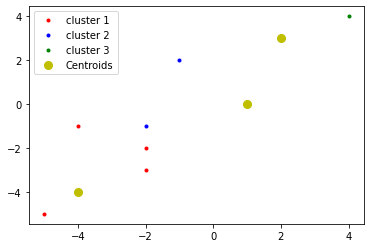

In [345]:
# display the clusters 

#clusters 
plt.plot(C1[:,0],C1[:,1],'r.', label='cluster 1')
plt.plot(C2[:,0],C2[:,1],'b.', label='cluster 2')
plt.plot(C3[:,0],C3[:,1],'g.', label='cluster 3')

# centers
plt.plot(centroids[:,0], centroids[:,1], 'yo', markersize = 8, label='Centroids')
plt.legend(loc='best')
plt.show()

### Part d 

In [346]:
centroids = []

# recalculate the mean over span of columns, hence axis 0
for idx in range(3):
    temp_cent = x[clusters==idx].mean(axis=0)
    centroids.append(temp_cent)
    
centroids = np.vstack(centroids)

centroids


array([[-3.4       , -3.        ],
       [-0.66666667,  0.33333333],
       [ 3.        ,  3.5       ]])

In [347]:
dist_a = centroids[0,:] - x
dist_b = centroids[1,:] - x
dist_c = centroids[2,:] - x

ka = la.norm(dist_a, axis=1)
kb = la.norm(dist_b, axis=1)
kc = la.norm(dist_c, axis=1)

In [348]:
# minimize the distance for the clusters 
clusters = np.argmin([k1, k2, k3], axis=0)
clusters

array([0, 1, 2, 1, 0, 0, 1, 0, 0, 2], dtype=int64)

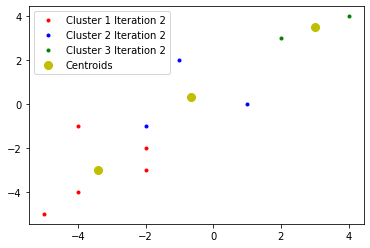

In [349]:
Ca = x[clusters==0]
Cb = x[clusters==1]
Cc = x[clusters==2]

centroids_iter2 = np.array([centroids[0,:], centroids[1, :], centroids[2, :]])

fig = plt.figure()
ax = fig.add_subplot(111)

#plot the results 

ax.plot(Ca[:, 0], Ca[:,1], 'r.', label = "Cluster 1 Iteration 2")
ax.plot(Cb[:, 0], Cb[:,1], 'b.', label = "Cluster 2 Iteration 2")
ax.plot(Cc[:, 0], Cc[:,1], 'g.', label = "Cluster 3 Iteration 2")
ax.plot(centroids_iter2[:,0], centroids_iter2[:,1], 'yo', markersize=8, label='Centroids')
ax.legend(loc='best')
plt.show()

In [350]:
# compute and print the standard errors in the cluster estimations 

error_a = sq_error(Ca, centroids_iter2[0,:])
error_b = sq_error(Cb, centroids_iter2[1,:])
error_c = sq_error(Cc, centroids_iter2[2,:])

print("Error in Cluster 1, Iteration 2: ", error_a)

print("Error in Cluster 2, Iteration 2: ", error_b)

print("Error in Cluster 3, Iteration 2: ", error_c)

Error in Cluster 1, Iteration 2:  4.147288270665544
Error in Cluster 2, Iteration 2:  3.055050463303893
Error in Cluster 3, Iteration 2:  1.5811388300841898


### part e

Performing another iteration does improve the accuracy of the centroids.  This is because it can use information about the previous clusters to recalculate the means.  By narrowing the populations to the previously calculated clusters, the new centroids will begin to converge to the true means.  This is also evident by comparing the squared errors between the first and second iterations.  The errors in the second iteration are all smaller than the error in the first (see the printed output above for the actual values).

### Part f

Squared Error of cluster 1 8.426149773176359
Squared Error of cluster 2 11.045361017187261
Squared Error of cluster 3 4.69041575982343


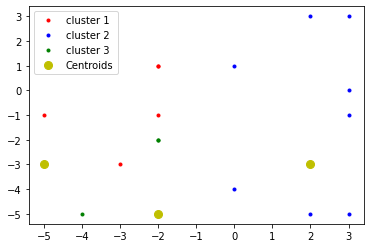

In [351]:
x_rand = np.random.randint(-5, 5, (20, 2))

c1 = x_rand[0,:]
c2 = x_rand[1,:]
c3 = x_rand[2,:]

dist1 = c1 - x_rand
dist2 = c2 - x_rand
dist3 = c3 - x_rand 

k1 = la.norm(dist1, axis=1)
k2 = la.norm(dist2, axis=1)
k3 = la.norm(dist3, axis=1)

clusters = np.argmin([k1, k2, k3], axis=0)

clusters

C1 = x_rand[clusters==0]
C2 = x_rand[clusters==1]
C3 = x_rand[clusters==2]
centroids = np.array([c1, c2, c3])

sq_error1 = sq_error(C1, c1)
sq_error2 = sq_error(C2, c2)
sq_error3 = sq_error(C3, c3)

print('Squared Error of cluster 1', sq_error1)

print('Squared Error of cluster 2', sq_error2)

print('Squared Error of cluster 3', sq_error3)

# display the clusters 

#clusters 
plt.plot(C1[:,0],C1[:,1],'r.', label='cluster 1')
plt.plot(C2[:,0],C2[:,1],'b.', label='cluster 2')
plt.plot(C3[:,0],C3[:,1],'g.', label='cluster 3')

# centers
plt.plot(centroids[:,0], centroids[:,1], 'yo', markersize = 8, label='Centroids')
plt.legend(loc='best')
plt.show()

In [352]:
#second iteration
centroids = []

# recalculate the mean over span of columns, hence axis 0
for idx in range(3):
    temp_cent = x_rand[clusters==idx].mean(axis=0)
    centroids.append(temp_cent)
    
centroids = np.vstack(centroids)

centroids


array([[-3.16666667, -1.        ],
       [ 2.        , -1.4       ],
       [-2.5       , -3.5       ]])

In [353]:
dist_a = centroids[0,:] - x_rand
dist_b = centroids[1,:] - x_rand
dist_c = centroids[2,:] - x_rand

ka = la.norm(dist_a, axis=1)
kb = la.norm(dist_b, axis=1)
kc = la.norm(dist_c, axis=1)

In [354]:
# minimize the distance for the clusters 
clusters = np.argmin([k1, k2, k3], axis=0)
clusters

array([0, 1, 2, 0, 2, 1, 1, 1, 0, 1, 1, 0, 0, 2, 1, 1, 1, 2, 0, 1],
      dtype=int64)

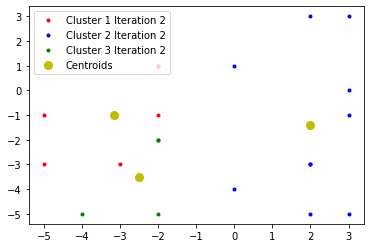

In [355]:
Ca = x_rand[clusters==0]
Cb = x_rand[clusters==1]
Cc = x_rand[clusters==2]

centroids_iter2 = np.array([centroids[0,:], centroids[1, :], centroids[2, :]])

fig = plt.figure()
ax = fig.add_subplot(111)

#plot the results 

ax.plot(Ca[:, 0], Ca[:,1], 'r.', label = "Cluster 1 Iteration 2")
ax.plot(Cb[:, 0], Cb[:,1], 'b.', label = "Cluster 2 Iteration 2")
ax.plot(Cc[:, 0], Cc[:,1], 'g.', label = "Cluster 3 Iteration 2")
ax.plot(centroids_iter2[:,0], centroids_iter2[:,1], 'yo', markersize=8, label='Centroids')
ax.legend(loc='best')
plt.show()

In [356]:
# compute and print the standard errors in the cluster estimations 

error_a = sq_error(Ca, centroids_iter2[0,:])
error_b = sq_error(Cb, centroids_iter2[1,:])
error_c = sq_error(Cc, centroids_iter2[2,:])

print("Error in Cluster 1, Iteration 2: ", error_a)

print("Error in Cluster 2, Iteration 2: ", error_b)

print("Error in Cluster 3, Iteration 2: ", error_c)

Error in Cluster 1, Iteration 2:  5.180090089306685
Error in Cluster 2, Iteration 2:  9.818350166906862
Error in Cluster 3, Iteration 2:  3.4641016151377544


## Homework Question 3

### Part a 

In [357]:
x11 = np.random.standard_normal((200, 1)) * 1.2 + np.ones((200,1))-2
x12 = np.random.standard_normal((200,1))*0.8 + np.ones((200,1))-2
x1 = np.concatenate((x11, x12), axis=1)

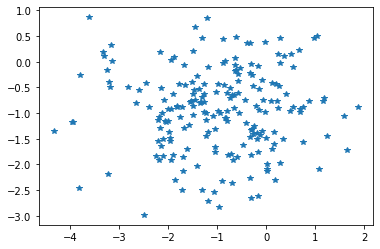

In [358]:
plt.plot(x1[:, 0], x1[:, 1], '*')

In [359]:
x21 = np.random.standard_normal((200, 1)) * 0.9 + np.ones((200,1))
x22 = np.random.standard_normal((200,1))*0.7 + np.ones((200,1))
x2 = np.concatenate((x21, x22), axis=1)


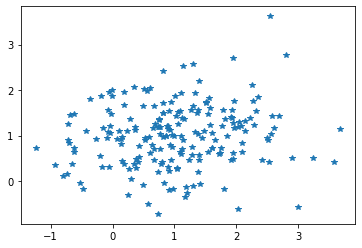

In [360]:
plt.plot(x2[:, 0], x2[:, 1], '*')

In [361]:
x31 = np.random.standard_normal((200,1))*0.8+np.ones((200,1))+3
x32 = np.random.standard_normal((200,1))*0.5+np.ones((200,1))+4
x3 = np.concatenate((x31,x32), axis=1)

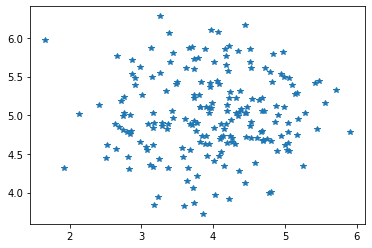

In [362]:
plt.plot(x3[:, 0], x3[:, 1], '*')

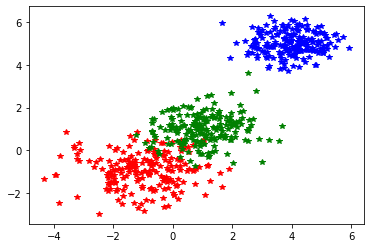

In [363]:
X = np.concatenate((x1, x2, x3), axis=0)

plt.plot(X[0:200,0], X[0:200, 1], 'r*')
plt.plot(X[200:400,0], X[200:400,1], 'g*')
plt.plot(X[400:600,0], X[400:600, 1], 'b*')

### Part b and c

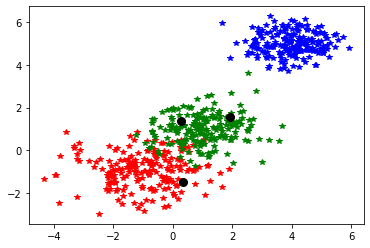

In [364]:
from scipy.spatial.distance import cdist

k = 3
x=X
no_of_iterations = 5

idx = np.sort(np.random.choice(len(x),k,replace=False))
centroids = x[idx,:]

k_by_1_corr_fn = cdist(x, centroids, 'seuclidean')
points = np.array([np.argmin(i) for i in k_by_1_corr_fn])

idx = np.sort(np.random.choice(len(x),k,replace=False))
centroids = x[idx,:]
points = np.array([np.argmin(i) for i in k_by_1_corr_fn])
old_cent = centroids

plt.plot(X[0:200,0],X[0:200,1],'r*')
plt.plot(X[200:400,0], X[200:400,1],'g*')
plt.plot(X[400:600,0],X[400:600,1],'b*')
plt.plot(centroids[:,0], centroids[:,1], 'ko', markersize=8, label='centroids')

err_thresh = 0.01

### Part d

Prior estimation error:  3.680031975345841
Iteration Number:  1


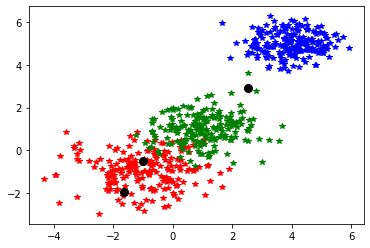

Prior estimation error:  -2.827324846680434
Iteration Number:  2


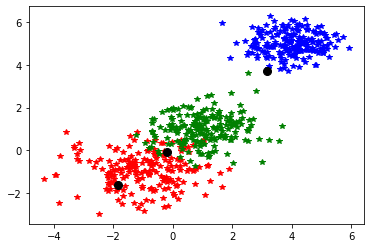

Prior estimation error:  -2.786941096235191
Iteration Number:  3


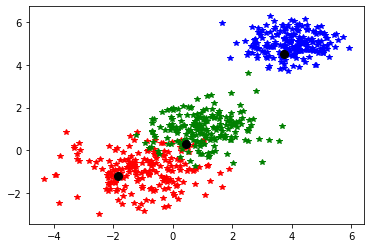

Prior estimation error:  -1.6064359444325569
Iteration Number:  4


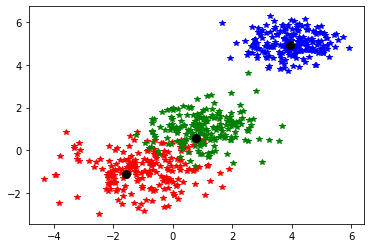

Prior estimation error:  -0.6828555421912417
Iteration Number:  5


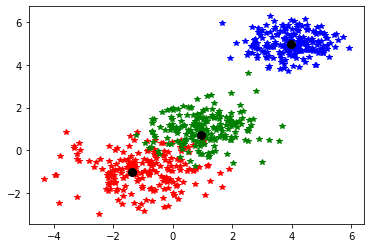

In [365]:
for i in range(no_of_iterations):
    
    centroids = []
    for idx in range(k):
        temp_cent = x[points==idx].mean(axis=0)
        centroids.append(temp_cent)
        
    centroids = np.vstack(centroids)
    prior_estimation_error = np.sum(old_cent - centroids)
    print("Prior estimation error: ",prior_estimation_error)
    if np.abs(prior_estimation_error) < 0.01:
        print("Required prior estimation error reached.")
        break
        
    print("Iteration Number: ", i+1)
    
    old_cent = centroids
    k_by_1_corr_fn = cdist(x, centroids, 'seuclidean')
    points = np.array([np.argmin(i) for i in k_by_1_corr_fn])

    fig = plt.figure()
    ax = plt.subplot(111)
    ax.plot(X[0:200,0], X[0:200, 1], 'r*')
    ax.plot(X[200:400,0], X[200:400,1], 'g*')
    ax.plot(X[400:600,0], X[400:600, 1], 'b*')

    ax.plot(centroids[:,0], centroids[:,1], 'ko', markersize=8, label='centroids')
    plt.show()

## Homework Question 4

In [366]:
def generateSamples(N, variance=100):
    import random
    X = np.matrix(range(N)).T + 1
    Y = np.matrix([random.random() * variance + i for i in range(len(X))]).T
    return X, Y

In [367]:
def fitModel_gradient(x,y, eta, maxIteration):
    N = len(x)
    w = np.zeros((x.shape[1],1))
    error = x * w - y
    old_gradient = x.T * error/N
    w = w - eta * old_gradient
    for i in range(maxIteration):
        error = x * w - y
        gradient = x.T * error/N
        w = w - eta *gradient
        prior_estimation_error = np.abs((old_gradient - gradient)[0])
        old_gradient = gradient

    print('Prior estimation error: ', prior_estimation_error)
    return w

In [368]:
def plotModel(x, y, w):
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.plot(x[:,1], y, "x")
    ax.plot(x[:,1], x*w, "r--")
    plt.show()

In [369]:
def test(N, variance, maxIter, eta, modelFunction):
    X,Y = generateSamples(N,variance)
    X = np.hstack([np.matrix(np.ones(len(X))).T, X])
    w = modelFunction(X,Y, eta, maxIter)
    plotModel(X,Y,w)

### Part a 

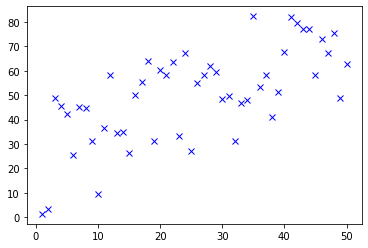

In [370]:
import random

fig = plt.figure()
ax = fig.add_subplot(111)

N1 = 50 
sigma1 = 50
X, Y = generateSamples(N1,sigma1)
ax.plot(X,Y, "bx")


### Part b / c

Iterations: 10000
Prior estimation error:  [[9.22707969e-05]]


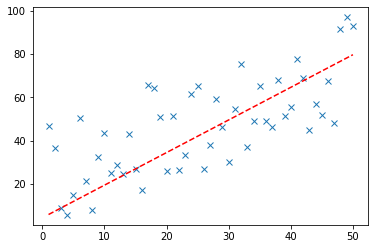

In [371]:
eta = 0.00001
maxIter = (10, 100, 1000)

print("Iterations: 10000")
test(N1, sigma1, 10000, eta, fitModel_gradient)

### Part d

N:  100 Sigma:  100
Iterations:  10000
Prior estimation error:  [[0.0002698]]


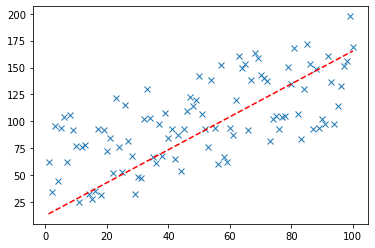

N:  200 Sigma:  50
Iterations:  10000
Prior estimation error:  [[9.94672075e-05]]


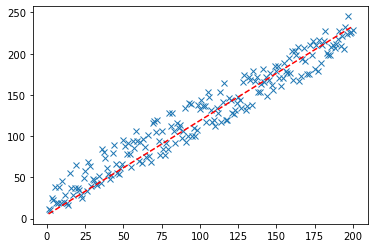

N:  500 Sigma:  300
Iterations:  10000
Prior estimation error: 

C:\Users\ryanm\AppData\Local\Temp/ipykernel_4456/1135100589.py:11: RuntimeWarning: invalid value encountered in subtract
  w = w - eta *gradient


 [[nan]]


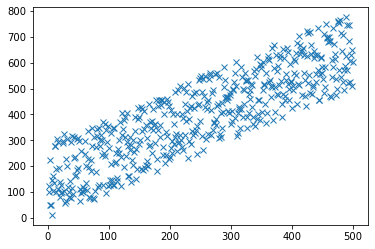

In [372]:
N = [100, 200, 500]
sigma = [100, 50, 300]

for n, sig in zip(N, sigma): 
    print("N: ", n, "Sigma: ", sig)
    
    print("Iterations: ", 10000)
    test(n,sig, 10000, eta, fitModel_gradient)
    

### Part e/f

Learning Rate:  1e-05
Iterations:  10
Prior estimation error:  [[1.60664604]]


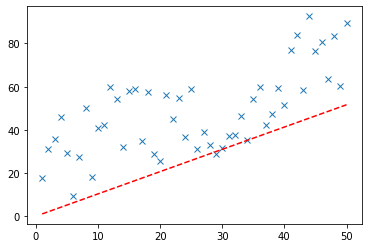

Iterations:  100
Prior estimation error:  [[0.0006564]]


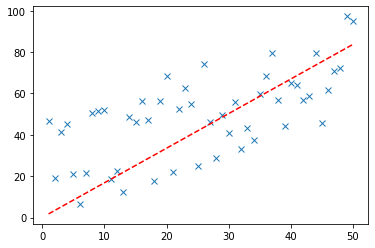

Iterations:  1000
Prior estimation error:  [[0.00016584]]


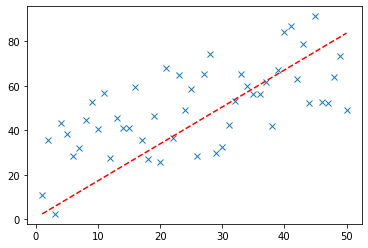

Iterations:  10000
Prior estimation error:  [[0.00013952]]


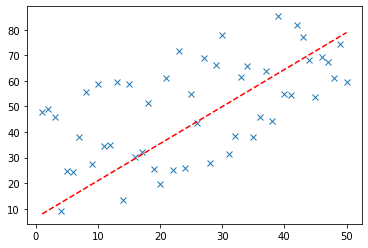

Learning Rate:  0.0001
Iterations:  10
Prior estimation error:  [[1.57002386]]


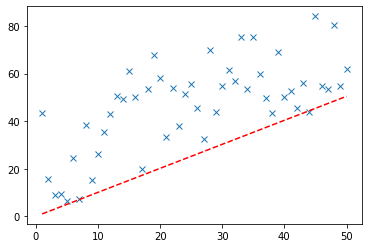

Iterations:  100
Prior estimation error:  [[0.00062012]]


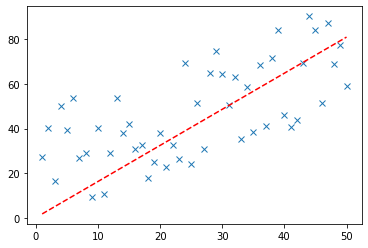

Iterations:  1000
Prior estimation error:  [[0.00014744]]


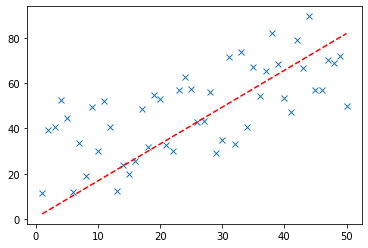

Iterations:  10000
Prior estimation error:  [[0.00013557]]


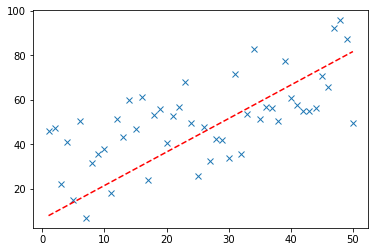

Learning Rate:  0.001
Iterations:  10
Prior estimation error:  [[1.72671614]]


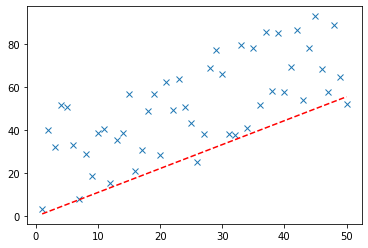

Iterations:  100
Prior estimation error:  [[0.00069369]]


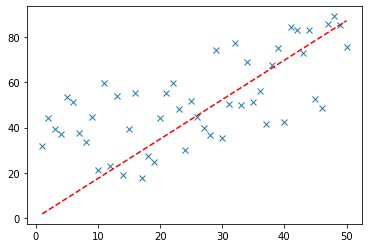

Iterations:  1000
Prior estimation error:  [[0.00012602]]


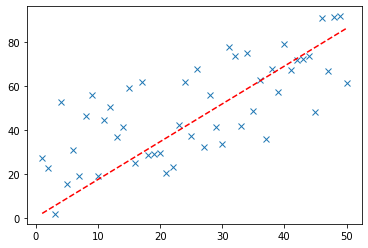

Iterations:  10000
Prior estimation error:  [[9.24069716e-05]]


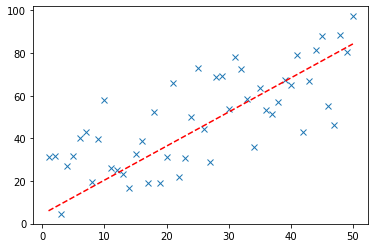

In [373]:
eta = [0.00001, 0.0001, 0.001]
N = 50 
sigma = 50

for e in eta:
    print("Learning Rate: ", e)
    
    print("Iterations: ", maxIter[0])
    test(N,sigma, maxIter[0], e, fitModel_gradient)
    
    print("Iterations: ", maxIter[1])
    test(N,sigma, maxIter[1], e, fitModel_gradient)
    
    print("Iterations: ", maxIter[2])
    test(N,sigma, maxIter[2], e, fitModel_gradient)
    
    print("Iterations: ", 10000)
    test(N, sigma, 10000,e , fitModel_gradient)

By increasing the learning rate, under the presumption of 50 points with a variance of 50, the error after 10,000 iterations decreases.  Also, the rate at which the error decreases seems to increase with a higher learning rate.

## Need to know for midterm and final:
Non-negative matrix factorization (NMF) is another dimension reduction method that unlike PCA, 

## Homework Question 5

In [374]:
# define functions for the primary function and its gradient 

import scipy.optimize as sopt
from mpl_toolkits.mplot3d import Axes3D

# surface equation
def f(x):
    return 0.1*x[0]**3 + 0.5*x[1]**2

# gradient of surface 
def df(x):
    return np.array([0.3*x[0]**2, 1*x[1]])

Estimation Error:  [-0.46989589 -1.87958358]
X1:  1.030104106058359  Y1:  -0.07958357576656461


C:\Users\ryanm\AppData\Local\Temp/ipykernel_4456/1319937042.py:35: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig)


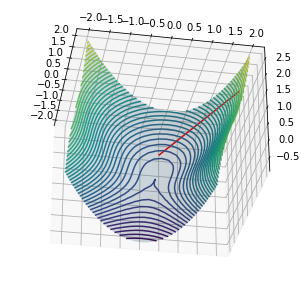

Estimation Error:  [-0.72636423  0.18705767]
X2:  0.3037398791580509  Y2:  0.10747409521919318


C:\Users\ryanm\AppData\Local\Temp/ipykernel_4456/1319937042.py:35: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig)


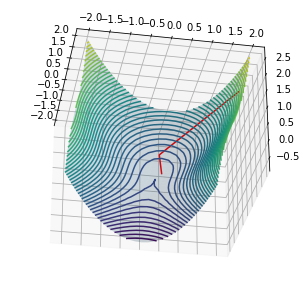

C:\Users\ryanm\AppData\Local\Temp/ipykernel_4456/1319937042.py:35: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig)


Estimation Error:  [-0.10006784 -0.11802533]


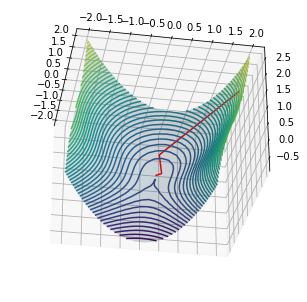

C:\Users\ryanm\AppData\Local\Temp/ipykernel_4456/1319937042.py:35: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig)


Estimation Error:  [-0.1243701   0.02147666]


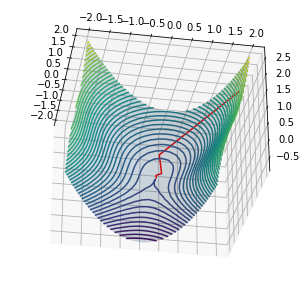

Estimation Error:  [-0.02759397 -0.01267206]


C:\Users\ryanm\AppData\Local\Temp/ipykernel_4456/1319937042.py:35: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig)


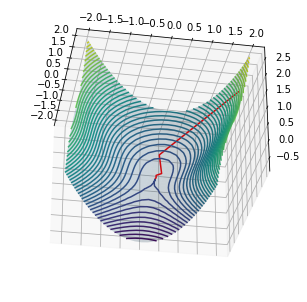

Estimation Error:  [-0.02838463  0.00319601]


C:\Users\ryanm\AppData\Local\Temp/ipykernel_4456/1319937042.py:35: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig)


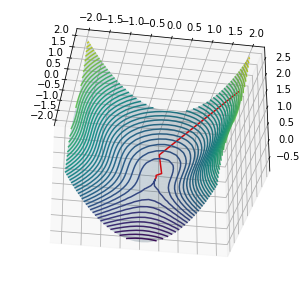

Estimation Error:  [-0.0085276  -0.00176642]


C:\Users\ryanm\AppData\Local\Temp/ipykernel_4456/1319937042.py:35: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig)


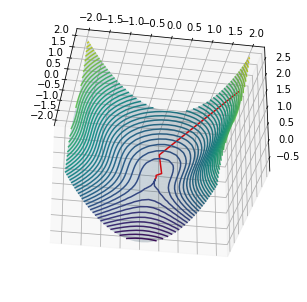

Estimation Error:  [-0.00753693  0.00053835]


C:\Users\ryanm\AppData\Local\Temp/ipykernel_4456/1319937042.py:35: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig)


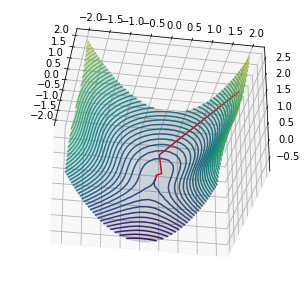

Estimation Error:  [-0.00276442 -0.00028093]


C:\Users\ryanm\AppData\Local\Temp/ipykernel_4456/1319937042.py:35: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig)


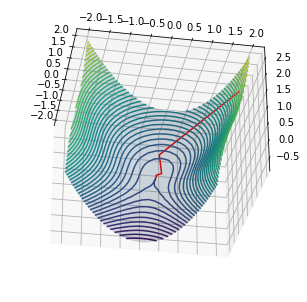

C:\Users\ryanm\AppData\Local\Temp/ipykernel_4456/1319937042.py:35: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig)


Estimation Error:  [-2.17408623e-03  9.61506975e-05]


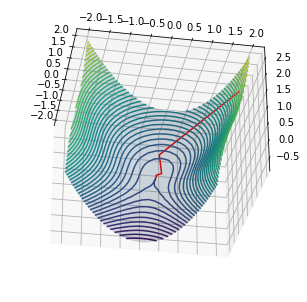

Iterations required for convergence:  10


In [375]:
guesses = [np.array([1.5, 1.8])]

epsilon = 0.0001

err = np.array([np.inf, np.inf])

n = 0
maxIters = 10000

#for i in range(3):
while np.abs(err[0]) > epsilon and np.abs(err[1])>epsilon and n < maxIters:

    x = guesses[-1]
    s = -df(x)
    
    def f1d(alpha):
        return f(x + alpha*s)
    
    alpha_opt = sopt.golden(f1d)
    next_guess = x + alpha_opt * s
    guesses.append(next_guess)
    
    err = guesses[-1] - guesses[-2]
    
    print("Estimation Error: ", err)
    
    n += 1
    
    if n == 1:
        print("X1: ", next_guess[0], " Y1: ", next_guess[1])
    if n == 2:
        print("X2: ", next_guess[0], " Y2: ", next_guess[1])
    
    fig = plt.figure()
    ax = Axes3D(fig)
    ax.azim = -10
    ax.dist = 10
    ax.elev = -30
    xmesh, ymesh = np.mgrid[-2:2:25j,-2:2:25j]
    fmesh = f(np.array([xmesh, ymesh]))
    ax.plot_surface(xmesh, ymesh, fmesh, alpha=0.2)
    ax.contour(xmesh, ymesh, fmesh, 50)
    it_array = np.array(guesses)
    ax.plot(it_array.T[0], it_array.T[1], f(it_array.T), "r-")
    plt.show()
    
print("Iterations required for convergence: ", n)

## Homework Question 6 : PCA

### Parts a-c

In [376]:
from sklearn.preprocessing import StandardScaler
from scipy.linalg import eigh

In [377]:
# the x train is the actual unidentified image matrix data 
data = x_train[0:15000, :, :]
# the y label is the truth data, or the answer key of what the digit should be 
labels = y_train[0:15000]
data = data.reshape(len(data), -1)
data.shape[1]

784

In [378]:
# standardizes data by normalizing between 0 and 1 
standardized_data = StandardScaler().fit_transform(data)

In [379]:
## Implementation of the PCA algorithm 
sample_data = standardized_data

t1 = timeit.timeit()
covar_matrix = np.matmul(sample_data.T, sample_data)


### Part b

In [380]:
print("Shape of Variance-Covariance Matrix: ", covar_matrix.shape)

# eigen value with the highest variation gives the best representation of the data
values, vectors = eigh(covar_matrix, eigvals=(data.shape[1] -2, data.shape[1] -1))
vectors = vectors.T
new_coordinates = np.matmul(vectors, sample_data.T)
new_coordinates = np.vstack((new_coordinates, labels)).T

t2 = timeit.timeit()

pca_time = t2 - t1

Shape of Variance-Covariance Matrix:  (784, 784)


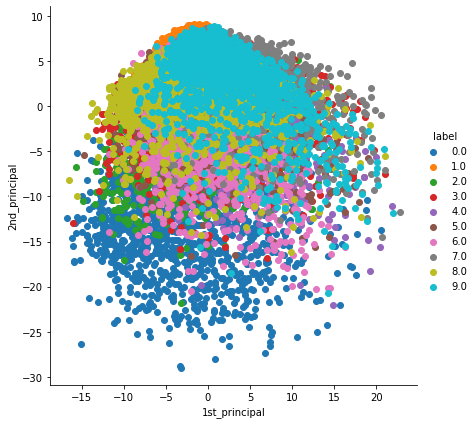

In [381]:
from sklearn import decomposition
import seaborn as sn
import pandas as pd 

pca_df = pd.DataFrame(data=new_coordinates, columns=("1st_principal", "2nd_principal", "label"))
sn.FacetGrid(pca_df, hue="label", height=6).map(plt.scatter, '1st_principal', '2nd_principal').add_legend()
plt.show()

### Part d 

This may not be fully sufficient because there is not enough variation between digits towards the top clusters, namely digits that are not 9 or 6

## Homework Question 7

### Parts a - b

In [382]:
data = x_test[0:15000,:,:]
labels = y_test[0:15000]
data = data.reshape(len(data),-1)

t1 = timeit.timeit()
standardized_data = StandardScaler().fit_transform(data)
sample_data = standardized_data
ica = decomposition.FastICA(n_components=2, fun='logcosh')
ica_data = ica.fit_transform(sample_data)

t2 = timeit.timeit()

ica_time = t2-t1

NameError: name 'x_test' is not defined

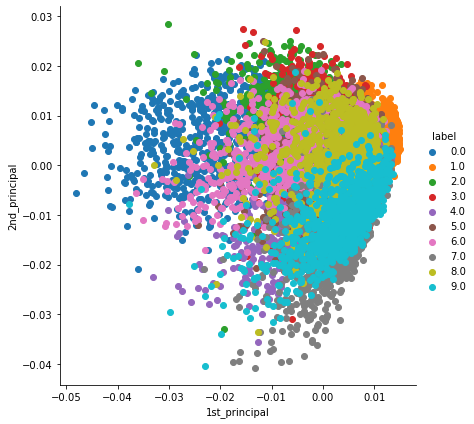

In [383]:
ica_data = np.vstack((ica_data.T, labels)).T
ica_df = pd.DataFrame(data=ica_data, columns=("1st_principal", "2nd_principal", "label"))
sn.FacetGrid(ica_df, hue="label", height=6).map(plt.scatter, '1st_principal', '2nd_principal').add_legend()
plt.show()

### Part c 

In [384]:
print("PCA time elapsed: ", pca_time, " ICA time elapsed: ", ica_time)

PCA time elapsed:  -0.00042559999565128237  ICA time elapsed:  0.002778300011414103


### Part d and e

d. There appears to be significantly better separation using ica instead of pca in this context, based on visual inspection of the plots

e. Two components would give better results for ica in this example.  However, it depends on the accuracy requirements.  Compared to the pca analysis, ica will have a more accurate confusion matrix.  However, there still is not full separation between all of the digits, indicating that there will be some degree of prediction error.  So it may not be fully sufficient to use 2 components, and more components could benefit the model, assuming it does not impose siginficant computational burden.

## Question 8

### Part a 

In [385]:
from sklearn.preprocessing import StandardScaler
from scipy.linalg import eigh
import pandas as pd
from sklearn import decomposition
import seaborn as sn
import matplotlib.colors as mcolors
import random

# calculate a pca for the training and testing data 

# load the mnst characer dataset
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

def pca(image_data, labels, n_comps):
    data = image_data.reshape(len(image_data), -1)
    data_size = data.shape[1]
    
    standardized_data = StandardScaler().fit_transform(data)
    sample_data = standardized_data
    covar_matrix = np.matmul(sample_data.T, sample_data)
    eig_idx = [i for i in range(data_size-n_comps, data_size)]
    #values, vectors = eigh(covar_matrix, eigvals=eig_idx)
    values, vectors = eigh(covar_matrix)
    vectors = vectors[:, eig_idx]
    vectors = vectors.T
    
    new_coordinates = np.matmul(vectors, sample_data.T)
    new_coordinates = np.vstack((new_coordinates, labels)).T
    
    return new_coordinates

def plot_pca(pca_data):
    pca_df = pd.DataFrame(data=pca_data, columns=("1st_principal", "2nd_principal", "label"))
    sn.FacetGrid(pca_df, hue="label", height=6).map(plt.scatter, '1st_principal', '2nd_principal').add_legend()
    plt.show()
    
def plot_pca3(pca_data):
    fig = plt.figure(figsize = (10, 10))
    ax = plt.axes(projection ="3d")
    
    labels = pca_data[:,-1]
    n_items = len(np.unique(labels))
    
    color_items = mcolors.get_named_colors_mapping().items()
    colors = random.sample(color_items, n_items)

    for dig in range(0,n_items):
        ax.scatter3D(pca_data[labels==dig,0], pca_data[labels==dig,1], pca_data[labels==dig,2], c=colors[dig][-1],
                  label = "Digit: "+str(dig))
    
    ax.set_xlabel("1st Component")
    ax.set_ylabel("2nd Component")
    ax.set_zlabel("3rd Component")
    
    ax.legend(loc='best')
    plt.show()


PCA Analysis
Training Data Plot using PCA using  2  components


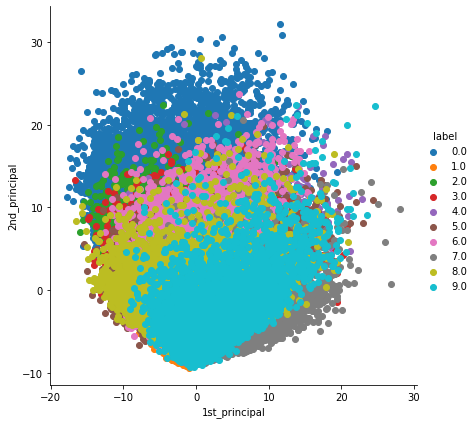

Test Data Plot using PCA using  2  components


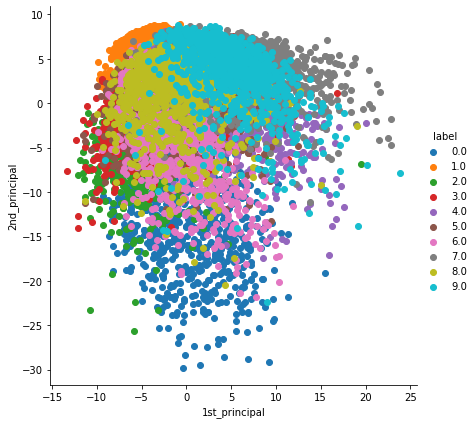

Demonstration of adding a PCA component usig test data


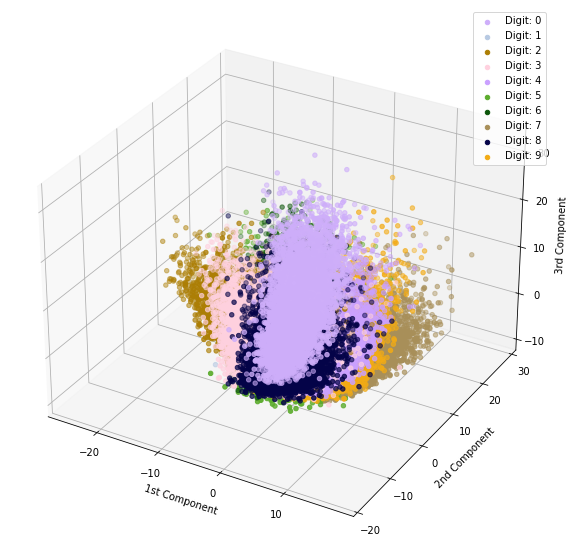

In [386]:
print("PCA Analysis")

data_train = x_train.reshape(len(x_train), -1)
data_test = x_test.reshape(len(x_test), -1)

labels_train = y_train
labels_test = y_test

n_comps = 2 
#n_comps = 10

image_size = data_train.shape[1]

pca_train = pca(data_train, labels_train, n_comps)
pca_test = pca(data_test, labels_test, n_comps)

pca_test_3comps = pca(data_train, labels_train, 3)

print("Training Data Plot using PCA using ", n_comps, " components")
plot_pca(pca_train)

print("Test Data Plot using PCA using ", n_comps, " components")
plot_pca(pca_test)

print("Demonstration of adding a PCA component usig test data")
plot_pca3(pca_test_3comps)

In [387]:
model = tf.keras.models.Sequential([tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(image_size,activation=tf.nn.tanh),
                                    tf.keras.layers.Dropout(0.2),
                                    tf.keras.layers.Dense(10,activation=tf.nn.softmax)])

model.compile(optimizer="SGD", loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])


### Part b 

In [388]:
model.fit(pca_train, labels_train, epochs=3)
test_predictions_pca = model.predict(pca_test)
confusion = confusion_matrix(labels_test, np.argmax(test_predictions_pca, axis=1))
confusion

Epoch 1/3
1875/1875 [==============================] - 1s 424us/step - loss: 1.2499 - accuracy: 0.5384
Epoch 2/3
1875/1875 [==============================] - 1s 437us/step - loss: 0.8431 - accuracy: 0.7085
Epoch 3/3
1875/1875 [==============================] - 1s 427us/step - loss: 0.6811 - accuracy: 0.7835


array([[  32,  890,   58,    0,    0,    0,    0,    0,    0,    0],
       [   0,    0, 1135,    0,    0,    0,    0,    0,    0,    0],
       [   0,  314,  474,  244,    0,    0,    0,    0,    0,    0],
       [   0,   60,    2,  929,   19,    0,    0,    0,    0,    0],
       [   0,   12,    0,    6,  852,   18,   84,   10,    0,    0],
       [   0,    5,    0,    0,  174,  115,  559,   39,    0,    0],
       [   0,   29,    0,    0,    0,    0,  561,  368,    0,    0],
       [   0,    0,    0,    0,    0,    0,  591,  286,  151,    0],
       [   0,    0,    0,    0,    0,    0,   12,   63,  851,   48],
       [   0,    0,    0,    0,    0,    0,    0,   40,  445,  524]],
      dtype=int64)

### Part c

In [389]:
def ica(image_data, labels, n_comps):
    
    data = image_data.reshape(len(image_data),-1)
    standardized_data = StandardScaler().fit_transform(data)
    sample_data = standardized_data
    ica = decomposition.FastICA(n_components=n_comps, fun='logcosh')
    ica_data = ica.fit_transform(sample_data)
    ica_data = np.vstack((ica_data.T, labels)).T
    
    return ica_data


def plot_ica(ica_data):
    ica_df = pd.DataFrame(data=ica_data, columns=("1st_principal", "2nd_principal", "label"))
    sn.FacetGrid(ica_df, hue="label", height=6).map(plt.scatter, '1st_principal', '2nd_principal').add_legend()
    plt.show()
    
def plot_ica3(ica_data):
    
    fig = plt.figure(figsize = (10, 10))
    ax = plt.axes(projection ="3d")
    
    labels = ica_data[:,-1]
    
    n_items = len(np.unique(labels))
    
    color_items = mcolors.get_named_colors_mapping().items()
    # hard coding 10 because I know there are only ten digits
    colors = random.sample(color_items, n_items)
    
    for dig in range(0,n_items):
        ax.scatter3D(ica_data[labels==dig,0], ica_data[labels==dig,1], ica_data[labels==dig,2], c=colors[dig][-1],
                  label = "Digit: "+str(dig))
    
    ax.set_xlabel("1st Component")
    ax.set_ylabel("2nd Component")
    ax.set_zlabel("3rd Component")
    
    ax.legend(loc='best')
    plt.show()


### Part d 

ICA Analysis
Training Data Plot using PCA using  2  components


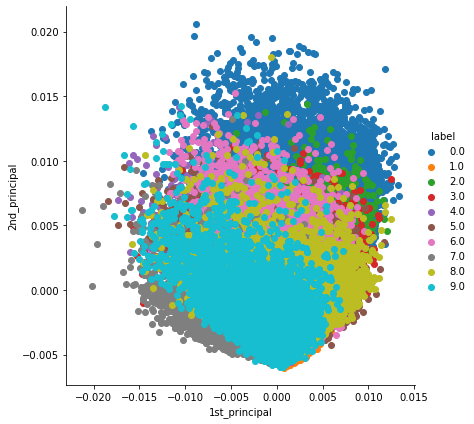

Testing Data Plot using ICA using  2  components


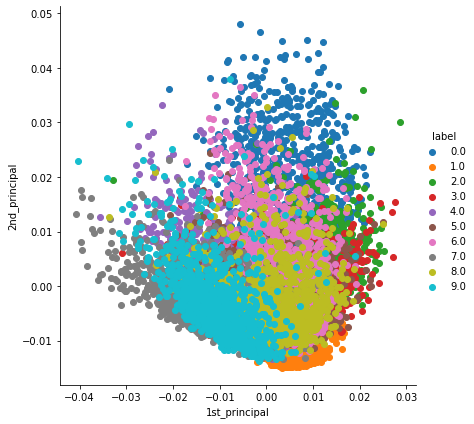

Plotting 3 ICA Components using Test Data


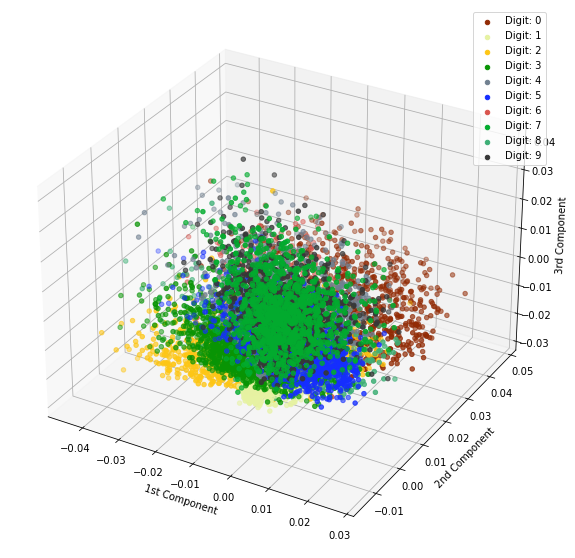

In [410]:
print("ICA Analysis")

n_comps = 2

ica_train = ica(data_train, labels_train, n_comps)
ica_test = ica(data_test, labels_test, n_comps)

# test using a third component 
ica_test3 = ica(data_test, labels_test, 3)

print("Training Data Plot using PCA using ", n_comps, " components")
plot_ica(ica_train)

print("Testing Data Plot using ICA using ", n_comps, " components")
plot_ica(ica_test)

print("Plotting 3 ICA Components using Test Data")
plot_ica3(ica_test3)

In [409]:
model.compile(optimizer="SGD", loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])

model.fit(ica_train, labels_train, epochs=3)

test_predictions_ica = model.predict(ica_test)
confusion = confusion_matrix(labels_test, np.argmax(test_predictions_ica, axis=1))
confusion

Epoch 1/3
1875/1875 [==============================] - 1s 422us/step - loss: 0.8744 - accuracy: 0.8585
Epoch 2/3
1875/1875 [==============================] - 1s 425us/step - loss: 0.6481 - accuracy: 0.9445
Epoch 3/3
1875/1875 [==============================] - 1s 416us/step - loss: 0.5508 - accuracy: 0.9717


array([[ 980,    0,    0,    0,    0,    0,    0,    0,    0,    0],
       [   0, 1135,    0,    0,    0,    0,    0,    0,    0,    0],
       [   0,    0, 1032,    0,    0,    0,    0,    0,    0,    0],
       [   0,    0,    0, 1010,    0,    0,    0,    0,    0,    0],
       [   0,    0,    0,    0,  982,    0,    0,    0,    0,    0],
       [   0,    0,    0,    0,    0,  892,    0,    0,    0,    0],
       [   0,    0,    0,    0,    0,    0,  958,    0,    0,    0],
       [   0,    0,    0,    0,    0,    0,    0, 1028,    0,    0],
       [   0,    0,    0,    0,    0,    0,    0,    0,  974,    0],
       [   0,    0,    0,    0,    0,    0,    0,    0,    0, 1009]],
      dtype=int64)

### Part e


In [391]:
# using PCA alteration as an example.

# First, we will examine using 3 components:

pca_train3 = pca(data_train, labels_train, 3)
pca_test3 = pca(data_test, labels_test, 3)

model.compile(optimizer="SGD", loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])

model.fit(pca_train3[:,0:3], pca_train3[:,3], epochs=3)

test_predictions_pca = model.predict(pca_test3[:,0:3])
confusion = confusion_matrix(labels_test, np.argmax(test_predictions_pca, axis=1))
confusion

Epoch 1/3
1875/1875 [==============================] - 1s 436us/step - loss: 2.3855 - accuracy: 0.4290
Epoch 2/3
1875/1875 [==============================] - 1s 439us/step - loss: 1.3486 - accuracy: 0.5006
Epoch 3/3
1875/1875 [==============================] - 1s 417us/step - loss: 1.2932 - accuracy: 0.5112


array([[  3, 231,   0,  25,  37,  39,  18, 118,  37, 472],
       [583,   0, 445,   1,   0,   5,  96,   0,   5,   0],
       [  5, 184, 306, 117,  21,  84, 148,   2,  62, 103],
       [ 42,  70, 364, 122,  20, 100, 226,   0,  52,  14],
       [157,   8,   0,  90, 360,  73,  47,  92,  52, 103],
       [ 84,  52,  36,  91, 275, 146,  84,   4,  39,  81],
       [ 65, 216,  18,  68,  25, 189, 162,  10, 109,  96],
       [194,   0,  10,  35, 520,  22,  55,  53,  28, 111],
       [131,  28, 121,  66, 132, 145, 214,  15,  39,  83],
       [203,   3,   1,  71, 468,  34,  40,  48,  53,  88]], dtype=int64)

In [392]:
# next, try changing the model a bit 
model = tf.keras.models.Sequential([tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(image_size,activation=tf.nn.tanh),
                                    tf.keras.layers.Dropout(0.02),
                                    tf.keras.layers.Dense(10,activation=tf.nn.softmax)])

model.compile(optimizer="SGD", loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])

model.fit(pca_train, labels_train, epochs=3)

test_predictions_pca = model.predict(pca_test)
confusion = confusion_matrix(labels_test, np.argmax(test_predictions_ica, axis=1))
confusion

Epoch 1/3
1875/1875 [==============================] - 1s 412us/step - loss: 1.1978 - accuracy: 0.5778
Epoch 2/3
1875/1875 [==============================] - 1s 412us/step - loss: 0.7939 - accuracy: 0.7530
Epoch 3/3
1875/1875 [==============================] - 1s 412us/step - loss: 0.6383 - accuracy: 0.8221


array([[ 980,    0,    0,    0,    0,    0,    0,    0,    0,    0],
       [   0, 1135,    0,    0,    0,    0,    0,    0,    0,    0],
       [   0,    0, 1032,    0,    0,    0,    0,    0,    0,    0],
       [   0,    0,    0, 1010,    0,    0,    0,    0,    0,    0],
       [   0,    0,    0,    0,  982,    0,    0,    0,    0,    0],
       [   0,    0,    0,    0,    0,  892,    0,    0,    0,    0],
       [   0,    0,    0,    0,    0,    0,  958,    0,    0,    0],
       [   0,    0,    0,    0,    0,    0,    0, 1028,    0,    0],
       [   0,    0,    0,    0,    0,    0,    0,    0,  974,    0],
       [   0,    0,    0,    0,    0,    0,    0,    0,    0, 1009]],
      dtype=int64)

The primary parameter to be tuned is the number of components to use (applies to both ICA and PCA, just the components are calculated differently).  Also, the parameters to the keras neural network can also be altered and the model can be recompiled as needed to better suit the datasets.

Based on the results above, it can be shown that adding more components increases the dimensionality of the dataset.  This is indicated by the 3d scatter plots computed above.  However, adding a third component reduced the accuracy and quality of the confusion matrix.

However, adjusting the model parameters made a difference.  Changing the dropout rate to 2 percent improved the accuracy, and produced a confusion matrix that is orthogonal, meaning the predictions matched for all the digits.

### Part f 

for the following two functions, I referenced the following source:
https://www.unioviedo.es/compnum/labs/new/kmeans.html

In [393]:
from sklearn.cluster import KMeans

In [394]:
# use the sklearn implementation to cluster image data 
def cluster_digit_images(image_data_flat, n=10):
    # fix seed to obtain initial centroids
    np.random.seed(1)

    kmeans = KMeans(n_clusters=n, init='random')
    kmeans.fit(image_data_flat)
    clusters = kmeans.predict(image_data_flat)

    return clusters

In [395]:
# plot the clustered mnist image datasets based on the sklearn implementation 
def plot_clusters(clusters, image_data_flat, n=10, thin_factor=10):

    for i in range(n):

        # figure out the row of z corresponding to the ith cluster
        row = np.where(clusters == i)[0]
        num_elements = row.shape[0]

        #divide by 20 to thin the number of images to be plotted
        num_rows = np.floor((num_elements/n)/thin_factor)

        print("displaying cluster: " + str(i+1))
        print("With: " + str(num_elements) + " elements")

        plt.figure(figsize=(10, 10))

        # only going to plot every 20th element here
        plot_element = 0
        for r in range(0, num_elements, thin_factor):
            plt.subplot(num_rows+1, n, plot_element+1)
            image = image_data_flat[row[r], :]
            image = image.reshape(28, 28)
            plt.imshow(image)
            plt.axis('off')
            plot_element += 1

        plt.show()

In [396]:
# function to get random choices of all unique digits in 0-9 
def get_each_digit(image_data, labels):
    
    unique_digit_sets = []
    # loop through all the digits 0-9
    for dig in range(9+1):
        # find the indexes where the digits equal 0-9
        indexes = np.where(labels==dig)[0]
        # randomly select one of the digits that are the same technically
        idx = np.random.choice(indexes, 1, replace = False)
        # append the digit images to the list that will be of length 10
        unique_digit_sets.append(image_data[idx, :])
    
    # stack together
    unique_digit_sets = np.vstack(unique_digit_sets)
    # we know that the digits will be 0-9 in order based on the above logic 
    new_labels = np.arange(10)
    #data_set = np.vstack((unique_digit_sets, new_labels)).T
    return unique_digit_sets, new_labels

In [397]:
# attempt at my own implementation

def k_means_clustering(data, k=10, epsilon=0.01, max_iter=1000, random_init=True, labels=None):
    
    # first start by computing the initial clusters 
    
    if random_init:
        idx = np.sort(np.random.choice(len(data), k ,replace=False))
        centroids = data[idx, :]
    else:
        centroids, _ = get_each_digit(data, labels)
        
    #centroids, sorted_labels = get_each_digit(data, image_labels)
    k_by_1_corr_fn = cdist(data, centroids, 'seuclidean')
    
    points = np.array([np.argmin(i) for i in k_by_1_corr_fn])
    old_cent = centroids
    
    for i in range(max_iter):
        
        centroids = []
        labels = []
        for idx in range(k):
            temp_cent = data[points==idx].mean(axis=0)
            centroids.append(temp_cent)
                
        centroids = np.vstack(centroids)
        prior_estimation_error = np.sum(old_cent - centroids)
        print("Prior estimation error: ",prior_estimation_error)
        if np.abs(prior_estimation_error) < epsilon:
            print("Required prior estimation error reached.")
            break

        print("Iteration Number: ", i+1)

        old_cent = centroids
        k_by_1_corr_fn = cdist(data, centroids, 'seuclidean')
        points = np.array([np.argmin(i) for i in k_by_1_corr_fn])
        
    # do plotting here 
    
    return centroids, points

def plot_k_means(data, centroids, points):
    # assuming for the sake of this homework that the data is 2D
    
    n = len(np.unique(points))
    
    fig = plt.figure()
    ax = fig.add_subplot(111)
    
    for i in range(0,n):
        cluster = data[points==i,:]
        ax.scatter(cluster[:,0], cluster[:, 1], label = "Cluster: "+str(i))
        
    for i in range(0, centroids.shape[0]):
        # plot the centroid 
        ax.plot(centroids[i,0], centroids[i,1], "ko")
        
    ax.set_xlabel('Principal_comp 1')
    ax.set_ylabel('Principal_comp 2')
    ax.set_title('Home brewed K-Means Algorithm')
    plt.show()
    

In [398]:
# copy data again for the sake of format
data_train = x_train.reshape(len(x_train), -1)
data_test = x_test.reshape(len(x_test), -1)

labels_train = y_train
labels_test = y_test

displaying cluster: 1
With: 877 elements


C:\Users\ryanm\AppData\Local\Temp/ipykernel_4456/3939611110.py:21: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  plt.subplot(num_rows+1, n, plot_element+1)


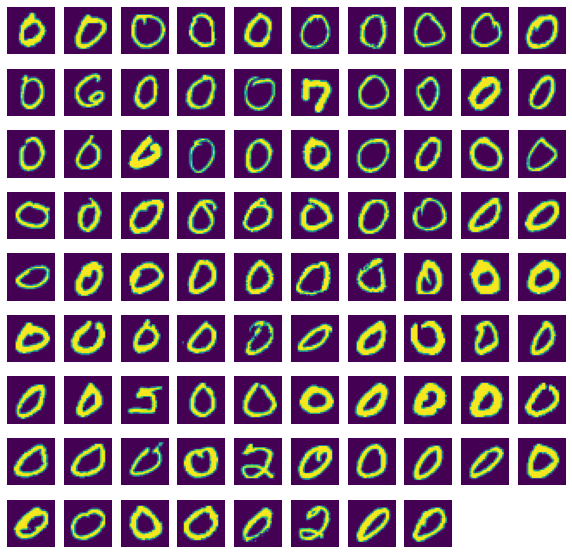

displaying cluster: 2
With: 1238 elements


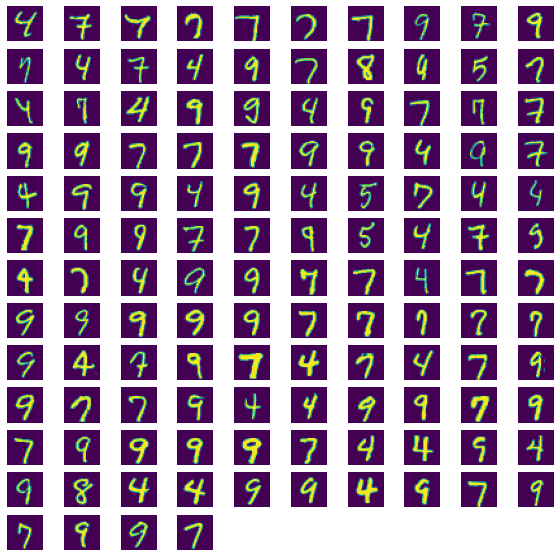

displaying cluster: 3
With: 809 elements


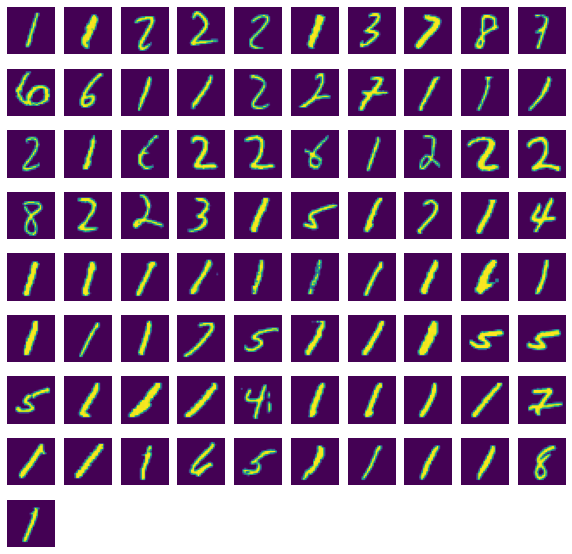

displaying cluster: 4
With: 1190 elements


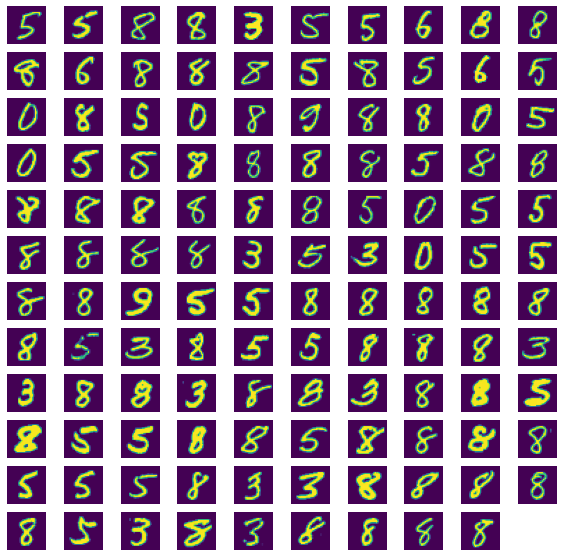

displaying cluster: 5
With: 809 elements


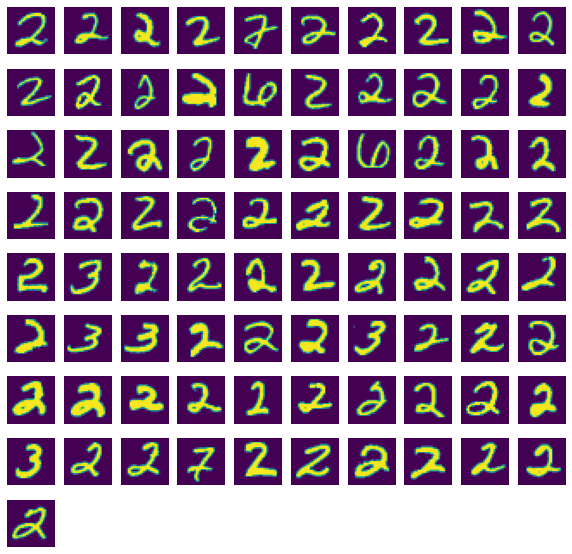

displaying cluster: 6
With: 1101 elements


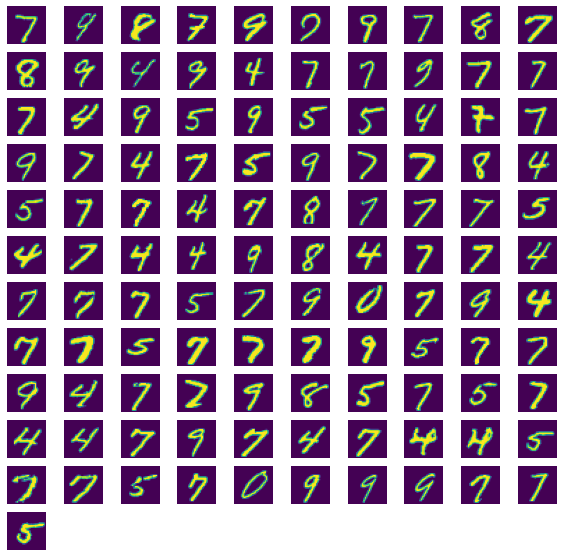

displaying cluster: 7
With: 862 elements


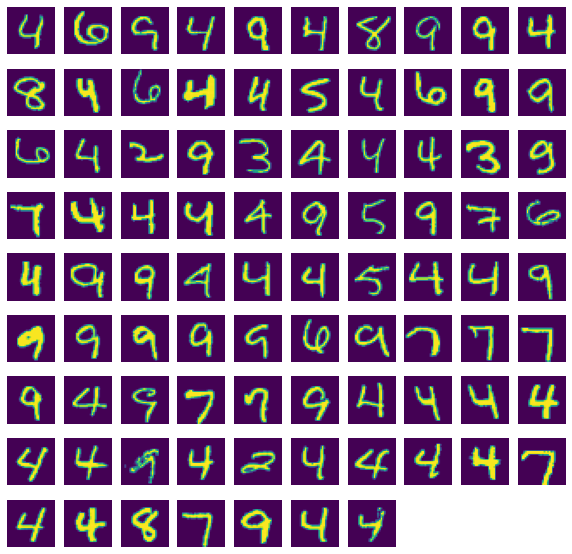

displaying cluster: 8
With: 876 elements


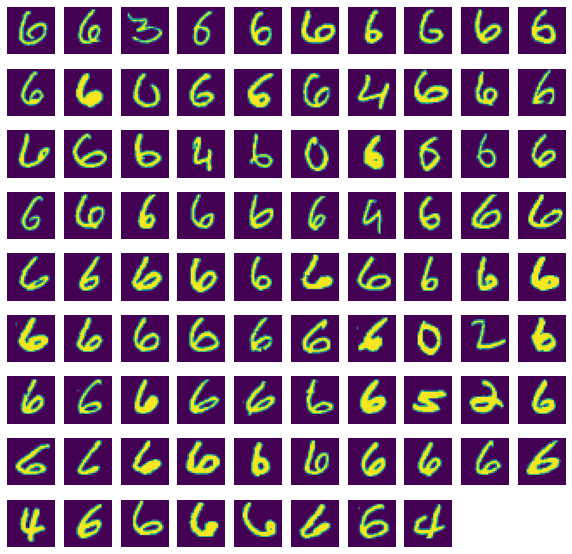

displaying cluster: 9
With: 915 elements


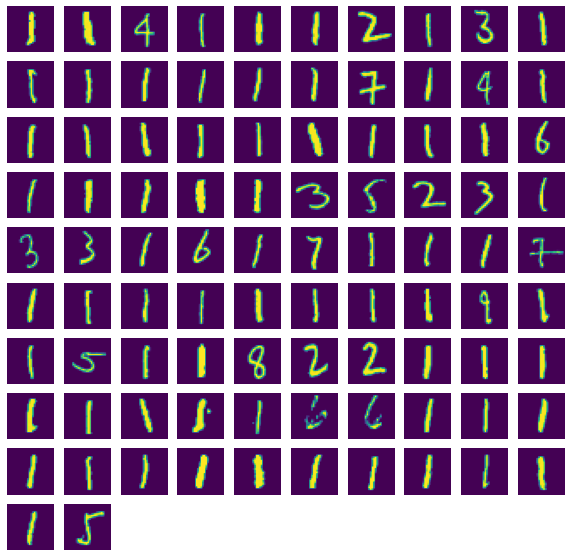

displaying cluster: 10
With: 1323 elements


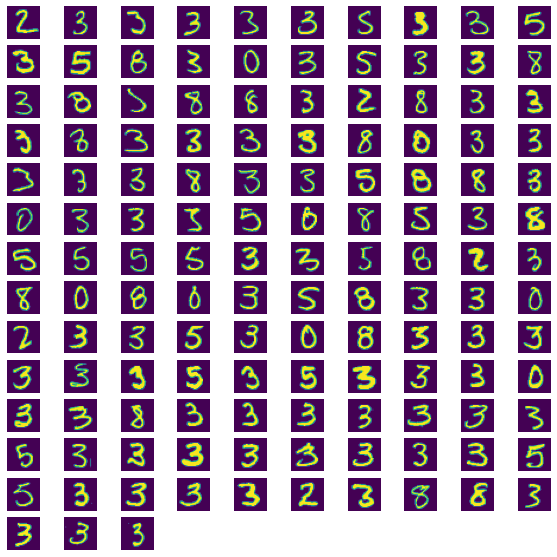

In [399]:
# use the k-means clustering algorithm on the image datasets by themselves 

clusters = cluster_digit_images(data_test, 10)

plot_clusters(clusters, data_test, 10, 10)

### Part h

In [400]:
def cluster_component_data(component_data, n = 10):
    kmeans = KMeans(n_clusters=n, init='random')
    kmeans.fit(component_data)
    clusters = kmeans.predict(component_data)
    return clusters

# only showing the first two principal components 
def plot_component_clusters(component_data, clusters, n=10, comp_type='PCA'):
    
    fig = plt.figure(figsize=(10,10))
    ax = fig.add_subplot(111)
    
    for i in range(n):
        subset = component_data[i==clusters, :]
        ax.scatter(subset[:, 0], subset[:, 1], label = "cluster "+str(i+1))
        ax.set_xlabel("1st Principal Component")
        ax.set_ylabel("2nd Principal Component")
        ax.set_title("Clustering of " + comp_type + " Data")
    
    ax.legend(loc='best')
    plt.show()



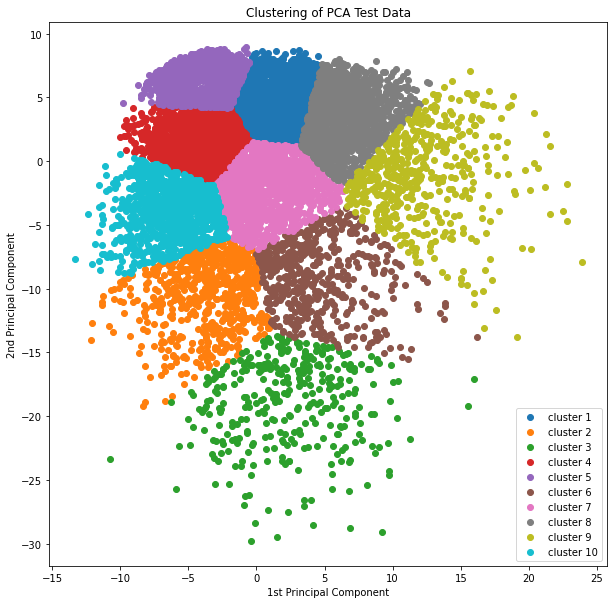

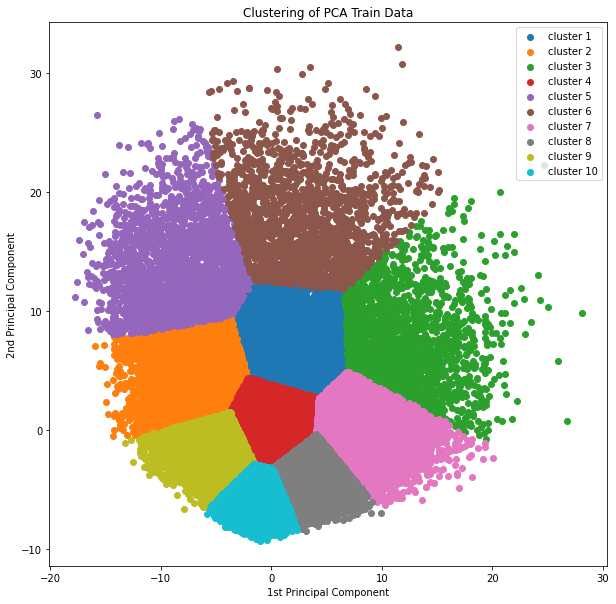

In [401]:
# use the clustering algorithm with the PCA data 
clusters_pca_test = cluster_component_data(pca_test[:, 0:2], 10)

plot_component_clusters(pca_test, clusters_pca_test, 10, 'PCA Test')

clusters_pca_train = cluster_component_data(pca_train[:, 0:2], 10)

plot_component_clusters(pca_train, clusters_pca_train, 10, 'PCA Train')

### Part i

Using Test Data


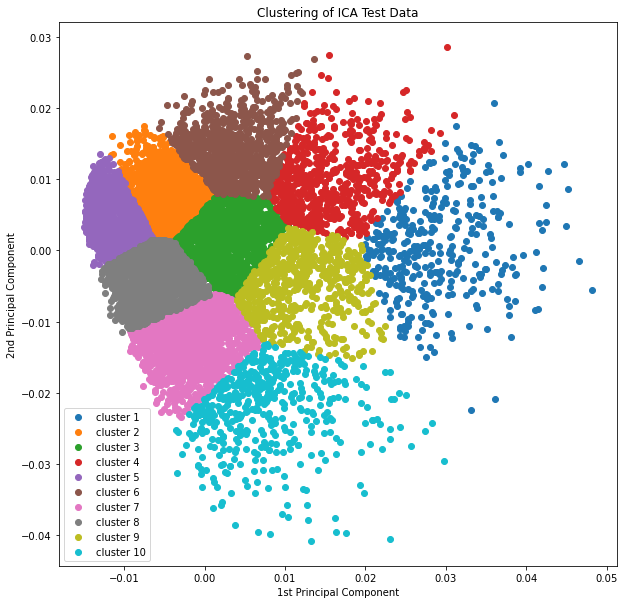

Using Train Data


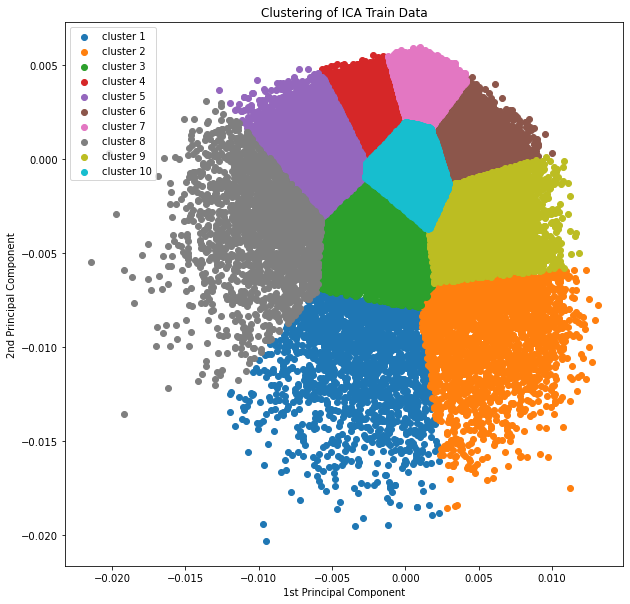

In [402]:
# use the clustering algorithm with the ICA data

clusters_ica_test = cluster_component_data(ica_test[:, [0,1]], 10)

print("Using Test Data")
plot_component_clusters(ica_test, clusters_ica_test, 10, 'ICA Test')

print("Using Train Data")
clusters_ica_train = cluster_component_data(ica_train[:, 0:2], 10)

plot_component_clusters(ica_train, clusters_ica_train, 10, 'ICA Train')

### Parts h / i. revamped

### My Own implementation of Clustering that isnt sklearn

In [403]:
centroids_pca_test, points_pca_test = k_means_clustering(pca_test[:, 0:2], 10, 0.01, 1000)

centroids_pca_train, points_pca_train = k_means_clustering(pca_train[:, 0:2], 10, 0.01, 1000)

centroids_ica_test, points_ica_test = k_means_clustering(ica_test[:, 0:2], 10, 0.01, 1000)

centroids_ica_train, points_ica_train = k_means_clustering(ica_train[:, 0:2], 10, 0.01, 1000)

Prior estimation error:  9.210578528956027
Iteration Number:  1
Prior estimation error:  5.681162946506987
Iteration Number:  2
Prior estimation error:  4.927902029755298
Iteration Number:  3
Prior estimation error:  3.636486619195309
Iteration Number:  4
Prior estimation error:  3.274107007699513
Iteration Number:  5
Prior estimation error:  2.8943167835866985
Iteration Number:  6
Prior estimation error:  2.5916110898215012
Iteration Number:  7
Prior estimation error:  2.1695389086477923
Iteration Number:  8
Prior estimation error:  1.7624504314771359
Iteration Number:  9
Prior estimation error:  1.5226058931172775
Iteration Number:  10
Prior estimation error:  1.3503159384328536
Iteration Number:  11
Prior estimation error:  1.1506083583618256
Iteration Number:  12
Prior estimation error:  0.8826009748412073
Iteration Number:  13
Prior estimation error:  0.6786502857619987
Iteration Number:  14
Prior estimation error:  0.7419226125501276
Iteration Number:  15
Prior estimation error: 

Plotting Clustered PCA Test Data


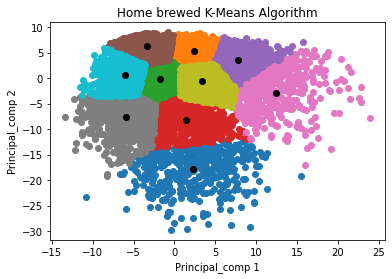

Plotting Clustered PCA Training Data


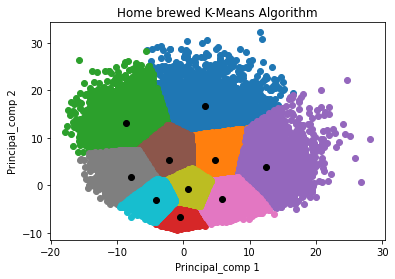

Plotting Clustered ICA Training Data


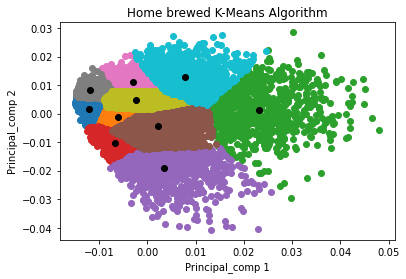

Plotting Clustered ICA Training Data


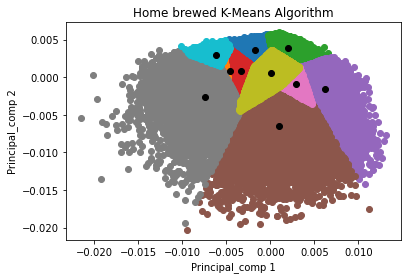

In [404]:
print("Plotting Clustered PCA Test Data")
plot_k_means(pca_test[:, 0:2], centroids_pca_test, points_pca_test)

print("Plotting Clustered PCA Training Data")
plot_k_means(pca_train[:, 0:2], centroids_pca_train, points_pca_train)

print("Plotting Clustered ICA Training Data")
plot_k_means(ica_test[:, 0:2], centroids_ica_test, points_ica_test)

print("Plotting Clustered ICA Training Data")
plot_k_means(ica_train[:, 0:2], centroids_ica_train, points_ica_train)

### Part j

In terms of the k-means algorithm itself, the exit tolerance, and number of iterations can be changed to get more accurate cluster centers.  Also, instead of using random clusters, perhaps it would be better to use known digits for the 10 clusters.  For example, using digits 0-9 for each.  Also, using more clusters may help (especially if using a random selection of data).  For example, in the next section, a lower tolerance will be used. This will be shown just for the pca_test data set. 

When using the PCA and ICA methods, the number of components chosen may also influennce characterization performance, as explored in previous parts of Q8.

In an attempt to demonstrate how giving known digits to the clustering alogrithm would effect performance, 10 digits that are labeled uniquely between 0-9 were given as the starting clusters.  The results are shown below.  The difference is somewhat minimal, but there is a slight difference in how the clusters were selected.  It is possible that these could be more accurate to the actual digit clusters.  

### Lowering Tolerance by a factor of 10

In [405]:
centroids_pca_test, points_pca_test = k_means_clustering(pca_test[:, 0:2], 10, 0.001, 1000)

Prior estimation error:  -2.8073296548065505
Iteration Number:  1
Prior estimation error:  1.5130427183750856
Iteration Number:  2
Prior estimation error:  2.4687394226343384
Iteration Number:  3
Prior estimation error:  2.6354641571069677
Iteration Number:  4
Prior estimation error:  2.8152064988996695
Iteration Number:  5
Prior estimation error:  2.2435473874000853
Iteration Number:  6
Prior estimation error:  1.505213768776334
Iteration Number:  7
Prior estimation error:  0.9585645307163966
Iteration Number:  8
Prior estimation error:  0.7282291176001102
Iteration Number:  9
Prior estimation error:  0.2625642418802169
Iteration Number:  10
Prior estimation error:  0.2729818922277183
Iteration Number:  11
Prior estimation error:  0.32522926502602656
Iteration Number:  12
Prior estimation error:  0.47091999656024375
Iteration Number:  13
Prior estimation error:  0.3894826119354784
Iteration Number:  14
Prior estimation error:  0.4141527411275221
Iteration Number:  15
Prior estimation 

Plotting Clustered PCA Test Data, lower Exit Tolerance


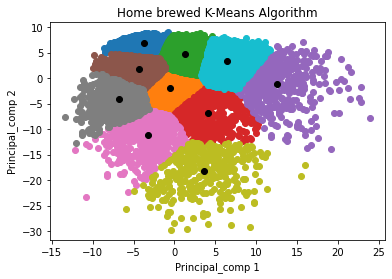

In [406]:
print("Plotting Clustered PCA Test Data, lower Exit Tolerance")
plot_k_means(pca_test[:, 0:2], centroids_pca_test, points_pca_test)

### Using Known Digits instead of selecting 10 at random

In [407]:
centroids_pca_test, points_pca_test = k_means_clustering(pca_test[:, 0:2], 10, 0.001, 1000, random_init=False, labels= pca_test[:, 2])

centroids_pca_train, points_pca_train = k_means_clustering(pca_train[:, 0:2], 10, 0.001, 1000, random_init=False, labels= pca_train[:, 2])

centroids_ica_test, points_ica_test = k_means_clustering(ica_test[:, 0:2], 10, 0.001, 1000, random_init=False, labels= ica_test[:, 2])

centroids_ica_train, points_ica_train = k_means_clustering(ica_train[:, 0:2], 10, 0.001, 1000, random_init=False, labels= ica_train[:, 2])

Prior estimation error:  5.5050851790615285
Iteration Number:  1
Prior estimation error:  3.630426301802676
Iteration Number:  2
Prior estimation error:  2.265329604106018
Iteration Number:  3
Prior estimation error:  1.4057887193122682
Iteration Number:  4
Prior estimation error:  0.5860677666514775
Iteration Number:  5
Prior estimation error:  0.3952427226669687
Iteration Number:  6
Prior estimation error:  0.5447997717153834
Iteration Number:  7
Prior estimation error:  0.539748712090674
Iteration Number:  8
Prior estimation error:  0.25507845838377036
Iteration Number:  9
Prior estimation error:  0.2186894263415285
Iteration Number:  10
Prior estimation error:  0.3270141311720003
Iteration Number:  11
Prior estimation error:  0.4018032284437951
Iteration Number:  12
Prior estimation error:  0.06147511324784227
Iteration Number:  13
Prior estimation error:  0.21143049081699794
Iteration Number:  14
Prior estimation error:  0.0858182950630546
Iteration Number:  15
Prior estimation er

Plotting Clustered PCA Test Data, Not Using Random Selection


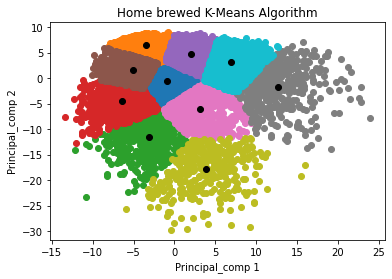

Plotting Clustered PCA Training Data, Not Using Random Selection


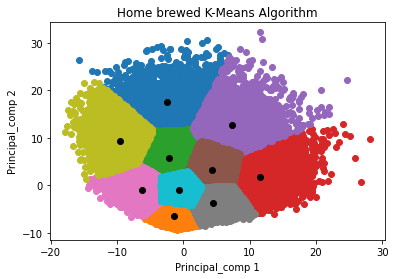

Plotting Clustered ICA Test Data, Not Using Random Selection


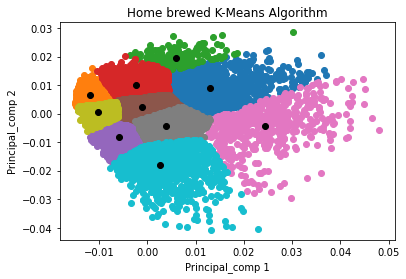

Plotting Clustered ICA Training Data, Not Using Random Selection


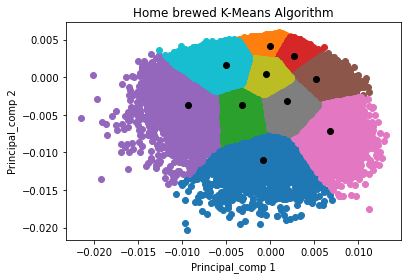

In [408]:
print("Plotting Clustered PCA Test Data, Not Using Random Selection")
plot_k_means(pca_test[:, 0:2], centroids_pca_test, points_pca_test)

print("Plotting Clustered PCA Training Data, Not Using Random Selection")
plot_k_means(pca_train[:, 0:2], centroids_pca_train, points_pca_train)

print("Plotting Clustered ICA Test Data, Not Using Random Selection")
plot_k_means(ica_test[:, 0:2], centroids_ica_test, points_ica_test)

print("Plotting Clustered ICA Training Data, Not Using Random Selection")
plot_k_means(ica_train[:, 0:2], centroids_ica_train, points_ica_train)

